In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

temp_df=pd.read_csv('temperature.csv', parse_dates=True, index_col='datetime')
temp_df.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,284.610000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868185,291.533501,293.403141,296.608509,285.154558,284.607305,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,284.599918,...,285.756824,288.326940,285.847789,287.231672,307.391513,304.281841,310.411539,304.4,304.4,303.5
2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,284.592530,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


## 1.What scale of measurement applies to timeseries data? Is timeseries data continuous or discrete? Why?

Timesseries datais quantitative (numeric) and countinuous (can be broken down) and within the interval scale of measurement (can be added or subtracted but not multiplied).

## 2.	What does ARIMA stand for? Break down and explain each piece in the name.

Auto-Regressive Integrated Moving Average explains a given time series based on its own past values (lags) and can be used to forecast future events. ARIMA consisits of 3 terms p,d, q:

p is the number of autoregressive terms (AR order)

d is the number of nonseasonal differences needed for stationarity 

q is the number of lagged forecast errors in the prediction equation (MA order)

## 3.	Using the data in the temperatures/ folder. Write a function that efficiently converts every column to a different temperature scale: one that is more common than Kelvin.

In [26]:
#kelvin to celsius (K-273.15), kelvin to fahrenheit (K − 273.15) × 1.8 + 32 
def temp_convert(f):
    f = ((k-273.15) * 1.8 + 32) #convert to fahrenheit
    return f
#applymap() applies a function that accepts and returns a scalar to every element of a DataFrame
f_df=temp_df.applymap(temp_convert, na_action='ignore') # set a new df to called function with the mapping
#na_action='ignore' NA values will not be passed to the mapping function
f_df.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,96.710000,NaN,NaN,NaN
2012-10-01 13:00:00,52.664000,48.074000,61.394000,47.570000,65.696000,65.084000,68.468000,74.210000,53.546000,52.628000,...,54.464000,59.126000,54.824000,57.236000,93.992000,90.176000,99.374000,88.25,88.25,86.63
2012-10-01 14:00:00,52.662274,48.079854,61.384987,47.564990,65.692734,65.090302,68.455654,74.225315,53.608205,52.623150,...,54.523774,59.175817,54.832370,57.264966,93.992000,88.088000,99.222385,88.25,88.25,86.63
2012-10-01 15:00:00,52.658596,48.095360,61.359113,47.551699,65.683120,65.108039,68.435919,74.266677,53.751113,52.609852,...,54.692283,59.318491,54.856021,57.347009,93.634723,88.037314,99.070769,88.25,88.25,86.63
2012-10-01 16:00:00,52.654918,48.110866,61.333238,47.538407,65.673506,65.125777,68.416183,74.308039,53.894021,52.596554,...,54.860793,59.461166,54.879672,57.429052,93.191359,87.958426,98.919154,88.25,88.25,86.63


In [33]:
#Methods using lambda functions to convert temp 
#df['Fahrenheit'] = df.apply(lambda x: (9/5)*x['Celsius']+32,axis=1)
#df.assign(Fahrenheit = lambda x: (9/5)*x['Celsius']+32)

## 4.	Write a function that efficiently fills in missing values in every column, excluding trailing NANs. That is: if there's temperature data on either side of a timestamp, it should interpolate through it. But if data stopped being collected, your function should leave nans at the end.

In [34]:
f_dfx=f_df.copy()

In [46]:
#interpolate removes NAN values
def interp_fun(df):
    df=df.interpolate(method='linear', limit_area ='inside') #method linear’: Ignore the index and treat the values as equally spaced 
    return df                                                #limit area:inside’: Only fill NaNs surrounded by valid values 
inter_df=interp_fun(f_dfx)  #create new df with applied function removing NAN
inter_df.tail()
#df=df.interpolate(method='ffill', limit_direction ='forward') # forward is the default direction 

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,47.930,NaN,45.806,68.720,66.200,61.502,70.808,54.626,61.538,...,62.762,NaN,35.564,58.874,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,49.532,NaN,47.300,72.554,67.262,63.428,72.392,55.940,63.590,...,60.962,NaN,33.764,55.166,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,50.432,NaN,49.280,73.058,66.974,64.742,73.580,55.922,61.808,...,56.534,NaN,32.594,51.422,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,49.766,NaN,49.658,72.500,67.028,66.200,75.200,55.382,60.836,...,52.556,NaN,30.794,48.236,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,48.434,NaN,49.802,71.204,64.850,65.282,75.200,52.790,53.654,...,50.486,NaN,29.570,45.500,NaN,NaN,NaN,NaN,NaN,NaN


## 5.Find all cities A and B where city A is warmer than city B in the summer, but also colder than city B in the winter, on average.

## 6.For two of the cities you found in question 5 (there are many possible answers), clean up the data via rolling averages and plot a clear visual. Explain how rolling average differs from moving average (MA) model.

## 7.	Perform SARIMA on five cities, iterating through the cities programmatically. Explain your results.  a.	Graph the predicted values 30 days out.


## 8.	Explain what you see when you perform results.summary() on the cities in question 7. 

## Bonus: What do GARCH and ARCH Stand for? Break down and explain each piece in the names. Explain the difference between the two. Create a GARCH and ARCH model on the same 5 cities from question 6. Explain and graph the results.


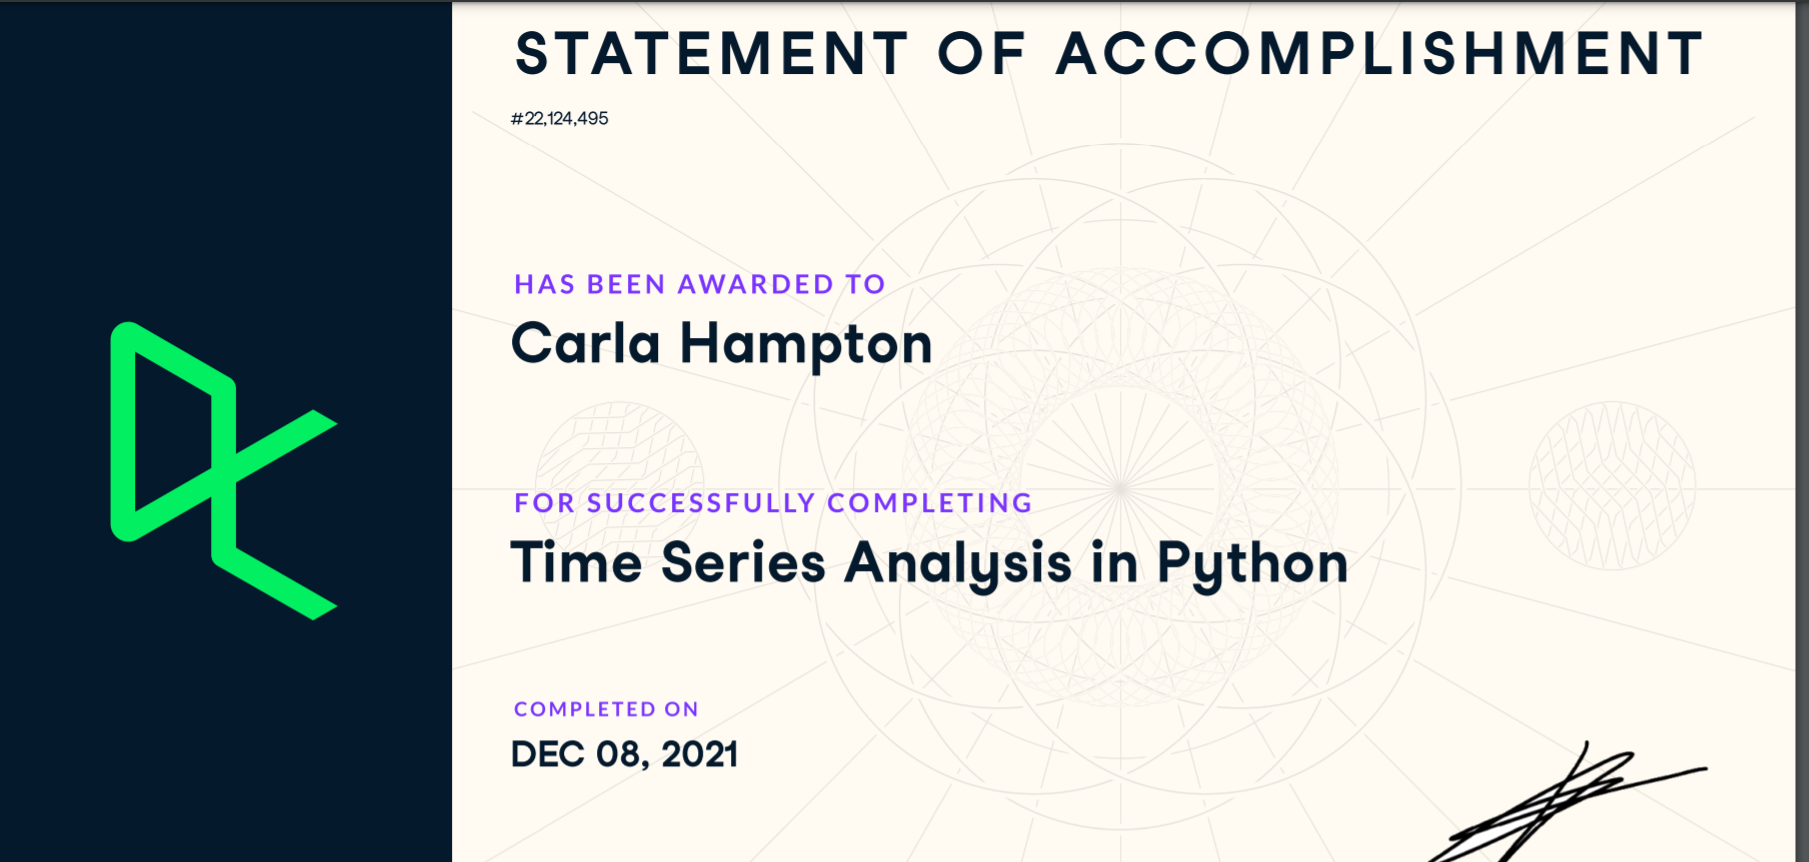